In [273]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

In [294]:
init = State(S=1000, I=1, R=0, D=0, W=1001)
#init /= sum (init)
init

,value
S,1000
I,1
R,0
D,0
W,1001


In [295]:
def make_system(beta, gamma, omega):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=1000, I=1, R=0, D=0, W=1001)
    #init /= sum(init)
    
    t0 = 0
    t_end = 30

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma,omega=omega)


In [296]:
def plot_results(S, I, R, D):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Resistant')
    plot(D, ':', color='black', label='Dead')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

In [297]:
def plot_results1(S, I, R, D, W):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Resistant')
    plot(D, ':', color='black', label='Dead')
    plot(W, '-', color='yellow', label='Total')
    decorate(xlabel='Time (days)',
             ylabel='Population')

In [346]:
tc = 7      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day
omega = gamma * .1

init = State(S=1000, I=1, R=0, D = 0, W=1001)
init

system = make_system(beta, gamma, omega)
system

,value
init,S 1000 I 1 R 0 D 0 W 1...
t0,0
t_end,30
beta,0.142857
gamma,0.25
omega,0.025


In [347]:
def update1(state, system):
    """Update the SIR model.
    
    state: State with variables S, I, R
    system: System with beta and gamma
    
    returns: State object
    """
    s, i, r, d, w = state
    
    recovered = system.gamma * i
    infected = system.beta * s 
    dead = system.omega * i 
  
    
    s -= infected
    s += 3
    i += infected
    i -= recovered
    i -= dead
    r += recovered
    d += dead 
    d +=  1
    w += 3
    w -= dead
    
    return State(S=s, I=i, R=r, D=d, W=w)

In [348]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    system: System object
    update_func: function that updates state
    
    returns: State object for final state
    """
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    D = TimeSeries()
    W = TimeSeries()

    state = system.init
    t0 = system.t0
    S[t0], I[t0], R[t0], D[t0], W[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], I[t+1], R[t+1], D[t+1], W[t+1] = state
    
    system.S = S
    system.I = I
    system.R = R
    system.D = D
    system.W = W

In [349]:
state = update1(init, system)
state


,value
S,860.142857
I,143.582143
R,0.250000
D,1.025000
W,1003.975000


In [350]:
run_simulation(system, update1)

In [351]:
def plot_results(S, I, R, D):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    plot(D, ':', color='black', label='Dead')
    decorate(xlabel='Time (days)',
             ylabel='population')

In [352]:
def plot_results1(S, I, R, D, W):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    plot(D, ':', color='black', label='Dead')
    plot(W, '-', color='yellow', label='Total')
    decorate(xlabel='Time (days)',
             ylabel='population')

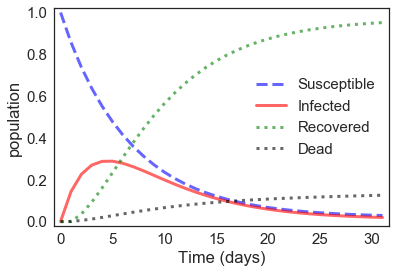

In [353]:
plot_results(system.S/system.W, system.I/system.W, system.R/system.W, system.D/system.W)


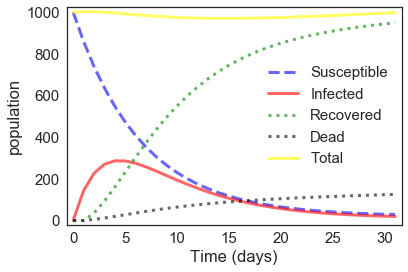

In [354]:
plot_results1(system.S, system.I, system.R, system.D, system.W)
